ANLY 590 \
HW 2 \
Masha Gubenko

**Question 1** 

**Question 1.1**

*Draw a network with:*
*   *2 inputs*
*   *1 hidden layers with 4 hidden units and a* 
*   *1-class output (for binary classification)*

The graph below represents a network with 2 inputs ($X_1$ and $X_2$), 4 hidden layers ($H_1$, $H_2$, $H_3$ and $H_4$) and 1 class output ($Y$). $w_{11}$ - $w_{24}$ and $v_1$ - $v_4$ represent the weights and $b_1$ - $b_4$ and $c$ represetn biases. 


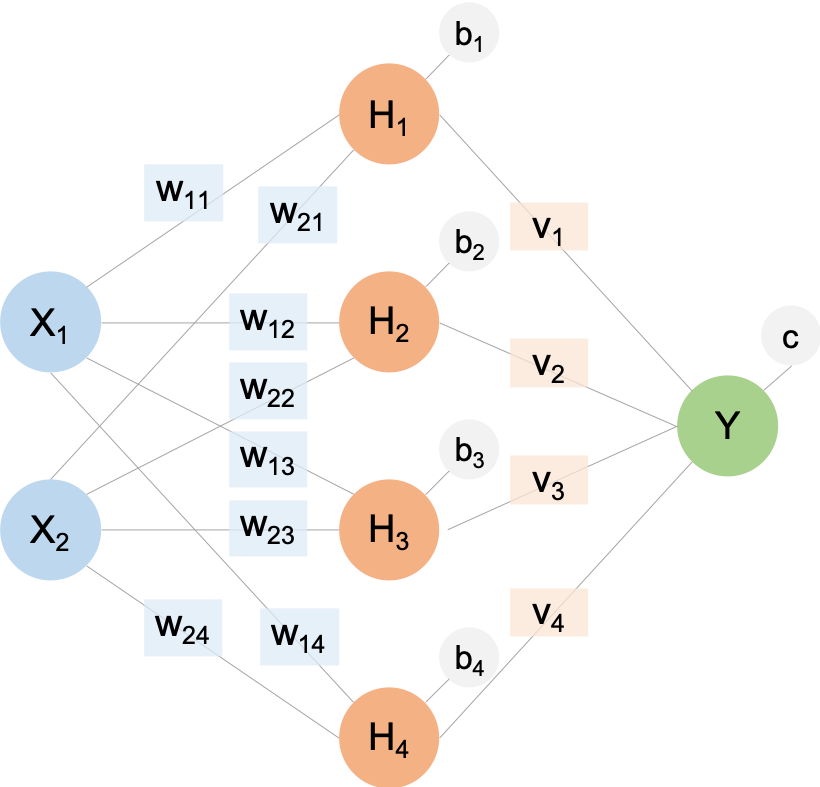

**Question 1.2**

*Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).*

The formulae below represent the mathematical equation for the output of the network. 

$Y = \frac{1}{(1-e^{v_1*h_1+v_2*h_2+v_3*h_3 + v_4*h_4+c})} $, where 

$h_1 = relu(w_{11}*x_1 + w_{21}*x_2 + b_1)$

$h_2 = relu(w_{12}*x_1 + w_{22}*x_2 + b_2)$

$h_3 = relu(w_{13}*x_1 + w_{23}*x_2 + b_3)$

$h_4 = relu(w_{14}*x_1 + w_{24}*x_2 + b_4)$

**Question 1.3** 

*Write out the forward-pass function in python, call it ff nn ReLu(...)*

Code below is a forward pass function for the network. 

In [1]:
#Importing the needed packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#This function is ReLU and takes in a vector and outputs its relu'ed version
def relu(z):
  for j in range(0,len(z)):
    z[j] = [max(0,i) for i in z[j]]
  return z

#This function calculates a sigmoid. It takes in a vector and outputs a vector of its sigmoid
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

#This is the forward pass function that takes in weights for inputs & hidden layes, 
#biases and the inputs and returns the output of the network
def ff_nn_Relu(w,b,v,c,x):

  #calculating the hidden nodes
  #applying relu to the input values
  h = relu(np.dot(x,w) + b)

  return sigmoid(sum(np.dot(h,v) + c)) #return the sigmoid of the final value as the probability output 

**Question 1.4** 

*What are the class probabilities associated with the forward pass of each sample?*


The code below applies the forward pass function to the given matricies and returns the probabilities for the two classes. 

In [6]:
w = [[1,-1,0,1], [0,0,0.5,1]]
b = [0,0,1,0]
v = [1,0,-1,1]
c = 1
X = [[1,-1],[0,-1],[0,1]]

In [7]:
p1 = ff_nn_Relu(w,b,v,c,X) #probability of one of the classes
p2 = 1 - p1 #probability of the second class

print([p1,p2])
print('Probability of class 1: ' + str(p1))
print('Probability of class 2: ' + str(p2))

[0.9241418199787566, 0.07585818002124345]
Probability of class 1: 0.9241418199787566
Probability of class 2: 0.07585818002124345


**Question 2** 

*Consider a simple non-convex function of two variables:*

$f(x,y) = (3-x^3) + 50*(2y^2-x)^2 = 3 - x^3 + 50*(4y^4 - 4xy^2 + x^2) = 3 - x^3 +200y^4 - 200xy^2 + 50x^2$

---



**Question 2.1**

*What are the partial derivatives of f with respect to x and to y?*

You can see the partial derivatives with respect to $x$ and $y$ below. 

$$\frac{df}{dx} = -3x^2 - 200y^2 + 100x$$
$$\frac{df}{dy} = 800y^3 - 400xy $$



**Question 2.2**

*Create a visualization of the contours of this function.*

The code below creates a contour plot of the function above.

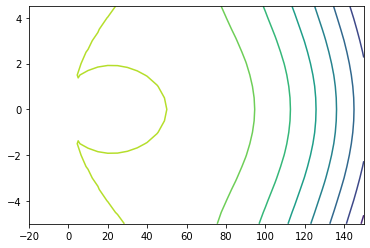

In [8]:
x = np.arange(-20,155, 5) #define x range
y = np.arange(-5, 5, 0.5) #define y range
X, Y = np.meshgrid(x, y) #set up the plot grid
Z = (3-X**3) + 50*(2*Y**2 - X)**2 #set up z as the given function of x and y
fig, ax = plt.subplots() #identify the plots
CS = ax.contour(X, Y, Z) #create a countour graph

**Question 2.3**

*Write a Gradient Descent algorithm for finding the minimum of the func- tion. Visualize your results with a few different learning rates.*

Code below is a gradient descent algorithm for finding the min of the given function. 

In [11]:
#This function calculates gradient of the function. 
#It takes in a vector of x & y values and outputs an array of partial derivative values.
def grad_f(vector):
    x, y = vector #define x and y
    df_dx = -3*x**2 - 200*y**2 + 100*x #calcualte the partial derivative of x
    df_dy = 800*y**3 - 400*x*y #calculate the partial derivative of y
    return np.array([df_dx, df_dy]) #output the result

In [12]:
#This function performs the gradient descent algorithm, it takes starting points, 
#number of iterations and leraning rate as inputs. 
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    
    if starting_point is None: #if no starting points is given, grab random values from the following
      pointx = np.random.uniform(-20,120,size=1)
      pointy = np.random.uniform(-3,3,size=1)
      point = [pointx, pointy]
    else: #otherwise take the given starting point
      point = starting_point
    trajectory = [point] #create a trajectory vector that accounts for each step

    for i in range(iterations): #looping thru the number of iterations
      grad = grad_f(point) #calcualte the gradient at the given point
      point = point - learning_rate*grad #calculate the point for the next step
      trajectory.append(point) #add the new step to the trajectory 

    return np.array(trajectory) #output the vector of gradient descent steps

The plot below shows the gradient descent with a small learning rate.

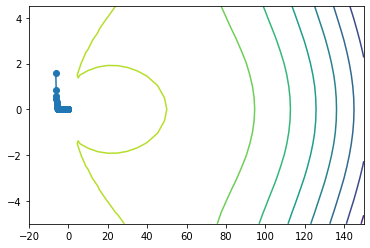

In [14]:
#Small learning rate
np.random.seed(19)
traj = grad_descent(iterations=1000, learning_rate=0.0001)

x = np.arange(-20,155, 5)
y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_autoscale_on(False)

a= traj[:,0]
b= traj[:,1]
plt.plot(a,b,'-o')

The plot below shows the gradient descent with a medium learning rate.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


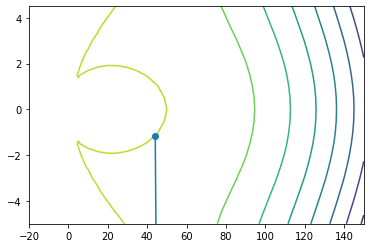

In [17]:
#Med learning rate
np.random.seed(35)
traj = grad_descent(iterations=100000, learning_rate=0.5)

x = np.arange(-20,155, 5)
y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_autoscale_on(False)

a= traj[:,0]
b= traj[:,1]
plt.plot(a,b,'-o')

The plot below shows the gradient descent with a large learning rate.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


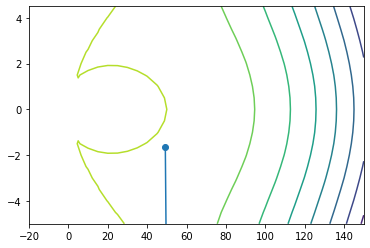

In [22]:
#Large learning rate
np.random.seed(50)
traj = grad_descent(iterations=1000, learning_rate=10)

x = np.arange(-20,155, 5)
y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_autoscale_on(False)

a= traj[:,0]
b= traj[:,1]
plt.plot(a,b,'-o')

**Question 2.4**

*Write a Gradient Descent With Momentum algorithm for finding the mini- mum. Visualize your results with a few different settings of the algorithm’s hyperparameters.*


In [23]:
#This function calculates gradient of the function. 
#It takes in a vector of x & y values and outputs an array of partial derivative values.
def grad_f(vector):
    x, y = vector #define x and y
    df_dx = -3*x**2 - 200*y**2 + 100*x #calcualte the partial derivative of x
    df_dy = 800*y**3 - 400*x*y #calculate the partial derivative of y
    return np.array([df_dx, df_dy]) #output the result

In [32]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):

  if starting_point is None:
      point = np.random.uniform(-5,5,size=2)
  else:
      point = starting_point
  trajectory = [point]
  v = np.zeros(point.size)

  for i in range(iterations):
      grad = grad_f(point)
      v = alpha*v + epsilon*grad
      point = point - v
      trajectory.append(point)
  
  return np.array(trajectory)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


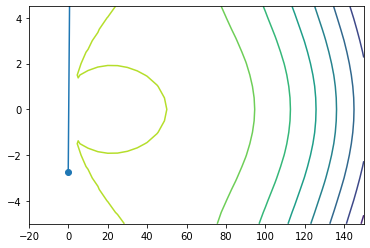

In [37]:
#Large learning rate
np.random.seed(50)
traj = grad_descent_with_momentum(iterations=1000, alpha = 0.005, epsilon = 12)

x = np.arange(-20,155, 5)
y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_autoscale_on(False)

a= traj[:,0]
b= traj[:,1]
plt.plot(a,b,'-o')

**Question 3**

**Question 3.1**

*For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.*

The Loss function is Binary Cross Entropy. Thusly, the partial derivatives with respect to the parameters are the following:

For $w_{11}$ through $w_{24}$, the partial derivative is derived as follows:

$$\frac{dL}{dw_{11}} = \frac{dL}{dy} * \frac{dy}{dz} * \frac{dz}{dw_{11}},$$ where $y = \frac{1}{(1-e^{z})} $; $z = v_1*h_1 + v_2*h_2+v_3*h_3 + v_4*h_4 + c;$ $h_1 = relu(w_{11}*x_1 + w_{12}*x_2 + b_1)$ and so on.

$$\frac{dL}{dy} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big)$$

$$ \frac{dy}{dz} = \hat{y}*(1-\hat{y})$$

$$ \frac{dz}{dw_{11}} = v_1*relu^‎{'}(i)*x_1,$$

where $i$ represents the inner part of the node e.g. $i = w_{11}*x_1 + w_{12}*x_2 + b_1$ adn so on. 

Using the chain rule, 

$$\frac{dL}{dw_{11}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * v_1*relu^‎{'}(i)*x_1 $$

We derive gradients similarly for $w_{12}$ through $w_{24}$ and get the following results.

$$\frac{dL}{dw_{12}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * v_2*relu^‎{'}(i)*x_1 $$

$$\frac{dL}{dw_{13}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * v_3*relu^‎{'}(i)*x_1 $$

$$\frac{dL}{dw_{14}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * v_4*relu^‎{'}(i)*x_1 $$

$$\frac{dL}{dw_{21}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * v_1*relu^‎{'}(i)*x_2 $$

$$\frac{dL}{dw_{22}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * v_2*relu^‎{'}(i)*x_2 $$

$$\frac{dL}{dw_{23}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * v_3*relu^‎{'}(i)*x_2 $$

$$\frac{dL}{dw_{24}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * v_4*relu^‎{'}(i)*x_2 $$

For $b_1$ through $b_4$, the partial derivative is derived as follows:

$$\frac{dL}{db_{1}} = \frac{dL}{dy} * \frac{dy}{dz} * \frac{dz}{db_{1}},$$ where $y = \frac{1}{(1-e^{z})} $; $z = v_1*h_1 + v_2*h_2+v_3*h_3 + v_4*h_4 + c;$ $h_1 = relu(w_{11}*x_1 + w_{12}*x_2 + b_1)$ and so on.

As before, 

$$\frac{dL}{dy} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big)$$

$$ \frac{dy}{dz} = \hat{y}*(1-\hat{y})$$

Then, 
$$ \frac{dz}{db_{1}} = relu^‎{'}(i)*x_1,$$

where $i$ represents the inner part of the node e.g. $i = w_{11}*x_1 + w_{12}*x_2 + b_1$ adn so on. 

Using chain rule, 

$$\frac{dL}{db_{1}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) *v_1* relu^‎{'}(i) $$

We derive gradients similarly for $b_{2}$ through $b_{4}$ and get the following results.

$$\frac{dL}{db_{2}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * v_2* relu^‎{'}(i) $$

$$\frac{dL}{db_{3}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * v_3* relu^‎{'}(i) $$

$$\frac{dL}{db_{4}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * v_4* relu^‎{'}(i) $$

For $v_1$ through $v_4$, the partial derivative is derived as follows:

$$\frac{dL}{dv_{1}} = \frac{dL}{dy} * \frac{dy}{dz} * \frac{dz}{dv_{1}},$$ where $y = \frac{1}{(1-e^{z})} $; $z = v_1*h_1 + v_2*h_2+v_3*h_3 + v_4*h_4 + c;$ $h_1 = relu(w_{11}*x_1 + w_{12}*x_2 + b_1)$ and so on.

As before, 

$$\frac{dL}{dy} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big)$$

$$ \frac{dy}{dz} = \hat{y}*(1-\hat{y})$$

Then, 
$$ \frac{dz}{dv_{1}} = h_1 = relu(w_{11}*x_1 + w_{12}*x_2 + b_1)$$

Using chain rule,

$$\frac{dL}{dv_{1}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * h_1 $$

We derive gradients similarly for $v_{2}$ through $v_{4}$ and get the following results.

$$\frac{dL}{dv_{2}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * h_2 $$

$$\frac{dL}{dv_{3}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * h_3 $$

$$\frac{dL}{dv_{4}} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) * h_4 $$

Lastly, for $c$ we derive the partial derivative as follows:

$$\frac{dL}{dc} = \frac{dL}{dy} * \frac{dy}{dz} * \frac{dz}{dc},$$ where $y = \frac{1}{(1-e^{z})} $; $z = v_1*h_1 + v_2*h_2+v_3*h_3 + v_4*h_4 + c;$ $h_1 = relu(w_{11}*x_1 + w_{12}*x_2 + b_1)$ and so on.

As before, 

$$\frac{dL}{dy} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big)$$

$$ \frac{dy}{dz} = \hat{y}*(1-\hat{y})$$

Then, 
$$ \frac{dz}{dc} = 1 $$

Using chain rule,

$$\frac{dL}{dc} = - \Big(\frac{y_i}{\hat{y}} - \frac{1-y_i}{1-\hat{y}}\Big) * (\hat{y}*(1-\hat{y})) $$


**Question 3.2**

*Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.*

The code below is the gradient function that takes in parameters and x values and outputs the gradietn vector.

In [3]:
#This function is the binary cross entropy loss function
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

#This function is the sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

#This function is the sigmoid derivative
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

#This function is the relu function
def relu(x):
    return np.maximum(x,0)

#This function is the relu derivative 
def relu_derivative(x):
    return np.where(x>0, 1, 0)

#This function is the loss function derivative with resepct to y
def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

#This function takes in one vector of all parameters and unflattens it
#It outputs a set of vectors for the model
def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec #split the vector
    W = np.array([[w_11,w_12, w_13, w_14],[w_21,w_22, w_23, w_24]]) #set up the w array
    b = np.array([b_1, b_2, b_3, b_4]) #set up the b vector
    v = np.array([v_1,v_2, v_3, v_4]) #set up the v vector
    c = np.array([c]) #set up c array
    return((W, b, v, c))

In [4]:
#This function calcualtes gradient for the function from Q1. 
#It taken in a single vector of parameters and x and y values.
#It outputs a vector of gradient values
def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec) #unflatten the param vector
    
    a = np.dot(x,W)+b #calculate the inner value of the node
    h = relu(a) #calcualte the outter value for the node
    y_a = np.dot(h,v)+c #combine the hidden nodes values
    y_hat = sigmoid(y_a) #apply activation function
    x = np.array(x) #make x an arry for easier calculation

    #Derive partial derivtives per q3.1
    dL_dc = np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a)) 
    
    dL_dv1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,0])
    dL_dv2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,1])
    dL_dv3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,2])
    dL_dv4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,3])
    
    dL_db1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]))
    dL_db2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]))
    dL_db3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]))
    dL_db4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]))

    dL_dw11 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,0])
    dL_dw12 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,0])
    dL_dw13 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,0])
    dL_dw14 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,0])
    
    dL_dw21 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,1])
    dL_dw22 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,1])
    dL_dw23 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,1])
    dL_dw24 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,1])

    #output the gradient vector 
    return np.array([dL_dw11, dL_dw12, dL_dw13, dL_dw14, dL_dw21, dL_dw22, dL_dw23, dL_dw24, dL_db1, dL_db2, dL_db3, dL_db4, dL_dv1, dL_dv2, dL_dv3, dL_dv4, dL_dc])

**Question 3.3**

*Generate a synthetic dataset like the XOR pattern (see below).*

Code below creates a sample dataset similar to XOR.

In [5]:
n = 200 #sets the size of the dataset
#create and x and y values in accordance with the XOR dataset rules
x1 = np.concatenate([np.random.uniform(low=-3, high=0, size=(n,)), np.random.uniform(low=0, high=3, size=(n,))])
y1 = np.concatenate([np.random.uniform(low=0, high=3, size=(n,)), np.random.uniform(low=-3, high=0, size=(n,))])
x2 = np.concatenate([np.random.uniform(low=0, high=3, size=(n,)), np.random.uniform(low=-3, high=0, size=(n,))])
y2 = np.concatenate([np.random.uniform(low=0, high=3, size=(n,)), np.random.uniform(low=-3, high=0, size=(n,))])

In [6]:
x = np.concatenate([x1,x2]) #group x values together
y = np.concatenate([y1,y2]) #combine y values
z = np.concatenate([np.repeat(0,2*n),(np.repeat(1,2*n))]) #create a vector of class for the x/y values

#loop through the x and y values and output tuples 
vals = []
for i in range(0,4*n):
  vals.append([x[i], y[i]])

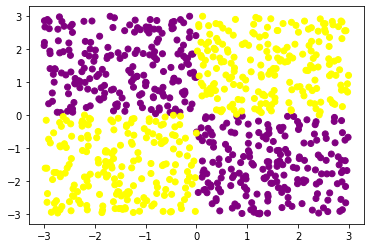

In [7]:
#Plot the created data to make sure it matches XOR
plotdf = pd.DataFrame() #set up an empty dataframe ahead of plotting
plotdf['x']=pd.Series(x) #make series type
plotdf['y']=pd.Series(y) #make series type
plotdf['z']=pd.Series(z) #make series type

#Make a scatter plot
fig, ax = plt.subplots()
colors = {0:'purple', 1:'yellow'}
ax.scatter(plotdf.x, plotdf.y, c=plotdf['z'].apply(lambda x: colors[x])) 
plt.show()

**Question 3.4**

*Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.*

Code below performs a gradient descent algorithm on the data above. 

In [8]:
#This function is a gradient descent algorithm.
#It takes in x and y data points as well as number of iterations and learning rate.
#It outputs the trajectory andvecotr of losses at every step.

def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=17).astype("float128") #create a random starting point for the parameters
    trajectory = [point] #start a trajectory vecotr
    losses = [loss(y, ff_nn_Relu(*pack_params(point),x))] #start the loss vector by calling the loss function and the forward pass function

    #loop through the number of iterations and adjust parameter values based on the learning rate and the gradient
    for i in range(iterations):
        grad = grad_f(point, x, y) #calculate the gradient
        point = point + learning_rate * grad #calculate the next point
        trajectory.append(point) #add to the trajectory vector 
        losses.append(loss(y, ff_nn_Relu(*pack_params(point),x))) #update the loss vector
    return (np.array(trajectory), losses)

In [9]:
#Apply the gradient descent function to the XOR dataset from 3.3
np.random.seed(107)
traj, losses = grad_descent(vals,z, iterations=2250,learning_rate=1e-5)

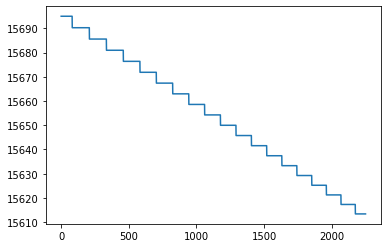

In [10]:
#Plot the loss through iterations
plt.plot(losses)

**Question 3.5**

*Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.*

Code below performs a gradient descent algorithm adding momentum. We can see from the loss plot below that using momentum helps achieve the smallest loss possible much quicker and more efficiently.

In [11]:
#This function is a gradient descent algorithm with momentum.
#It takes in x and y values as well as the iterations, and momentum paramenters.
#It outputs the trajectory and loss vectors at each interation step.
def grad_descent_with_momentum(x,y, iterations=10, alpha=.9, epsilon=10):
  point = np.random.uniform(-.1,.1,size=17).astype("float128") #set the inital parameter values
  trajectory = [point] #set up trajectory vector
  losses = [loss(y, ff_nn_Relu(*pack_params(point),x))] #set up loss vector and call the loss and forward pass functions
  v = np.zeros(point.size) #set up an empty vecotr

  #loop thru the interations
  for i in range(iterations):
      grad = grad_f(point, x, y) #calcualte the gradient
      v = alpha*v + epsilon*grad #create the momentum
      point = point - v #calculate the next step 
      trajectory.append(point) #append the trajectory vector
      losses.append(loss(y, ff_nn_Relu(*pack_params(point),x))) #append the loss vector 
  return (np.array(trajectory), losses)

In [14]:
#Apply the gradient descent function to the XOR dataset from 3.3
np.random.seed(198)
traj, losses = grad_descent_with_momentum(vals,z, iterations=125,alpha=.2, epsilon=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launche

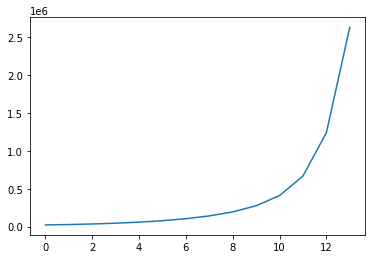

In [15]:
#Plot the loss through iterations
plt.plot(losses)

**Question 3.6**

*Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.*

Code below overalys the boundaries of the solution from the gradient descent with the original dataset. 

In [24]:
#This model calcaultes prediction values
def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

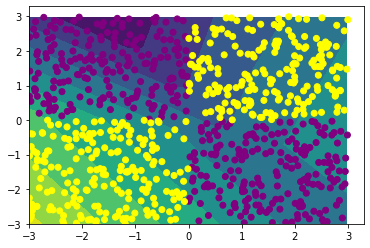

In [26]:
#Setting up the grid
delta = 0.025
x1 = np.arange(-3.0, 3.0, delta)
x2 = np.arange(-3.0, 3.0, delta)
X1, X2 = np.meshgrid(x1, x2)
#reshaping the predictions value 
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape(240,240)
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT) #creating a contour plot

#Adding the scatter plot
plt.scatter(plotdf.x, plotdf.y, c=plotdf['z'].apply(lambda x: colors[x]))